<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/data_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
cd "/content/drive/My Drive/competitions/Json"

/content/drive/My Drive/competitions/Json


In [0]:
from __future__ import division, print_function

import numpy as np
import json

In [0]:
def iou(box, clusters):
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection + 1e-10)

    return iou_

def avg_iou(boxes, clusters):
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])

def translate_boxes(boxes):
    new_boxes = boxes.copy()
    for row in range(new_boxes.shape[0]):
        new_boxes[row][2] = np.abs(new_boxes[row][2] - new_boxes[row][0])
        new_boxes[row][3] = np.abs(new_boxes[row][3] - new_boxes[row][1])
    return np.delete(new_boxes, [0, 1], axis=1)

def kmeans(boxes, k, dist=np.median):
    rows = boxes.shape[0]

    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))

    np.random.seed()

    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters

def get_kmeans(anno, cluster_num=9):

    anchors = kmeans(anno, cluster_num)
    ave_iou = avg_iou(anno, anchors)

    anchors = anchors.astype('int').tolist()

    anchors = sorted(anchors, key=lambda x: x[0] * x[1])

    return anchors, ave_iou

In [0]:
def parse_anno(annotation_path):
    result = []
    with open(annotation_path) as f:
        data = json.load(f)

    for i in data['images']:
        file_name = i['file_name']
        image_id = i['id']
        # box =  box.append[image_height, image_width]

        for a in data['annotations']:
            if a['image_id'] == image_id:
                bbox = [int(b) for b in a['bbox']]
                result.append([bbox[2], bbox[3]])
    result = np.asarray(result)
    return result

In [0]:
def parse_anno(annotation_path):
    result = []
    box_wh = []   # 总框的宽高
    box_wh1 = []  # 1框的宽高
    box_wh2 = []  # 2框的宽高
    box_wh3 = []  # 3框的宽高
    box_wh4 = []  # 4框的宽高
    box_wh5 = []  # 5框的宽高
    box_wh6 = []  # 6框的宽高
    box_wh7 = []  # 7框的宽高
    box_wh8 = []  # 8框的宽高
    box_wh9 = []  # 9框的宽高
    box_wh10 = [] # 10框的宽高
    with open(annotation_path) as f:
        data = json.load(f)
        
    for i in data['images']:
        file_name = i['file_name']
        image_id = i['id']
        for a in data['annotations']:
            if a['image_id'] == image_id:
                bbox = [int(b) for b in a['bbox']]
                box_wh.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 1:
                box_wh1.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 2:
                box_wh2.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 3:
                box_wh3.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 4:
                box_wh4.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 5:
                box_wh5.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 6:
                box_wh6.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 7:
                box_wh7.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 8:
                box_wh8.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 9:
                box_wh9.append([bbox[2], bbox[3]])
            if int(a["category_id"]) == 10:
                box_wh10.append([bbox[2], bbox[3]])
    result = np.asarray(box_wh)
    result1 = np.asarray(box_wh1)
    result2 = np.asarray(box_wh2)
    result3 = np.asarray(box_wh3)
    result4 = np.asarray(box_wh4)
    result5 = np.asarray(box_wh5)
    result6 = np.asarray(box_wh6)
    result7 = np.asarray(box_wh7)
    result8 = np.asarray(box_wh8)
    result9 = np.asarray(box_wh9)
    result10 = np.asarray(box_wh10)
    return result , result1,   result2,   result3,   result4,   result5,   result6,   result7,   result8,   result9,   result10      
    
    

In [28]:
if __name__ == '__main__':
    annotation_path = "annotations.json"
    result,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10 = parse_anno(annotation_path)
    for k in range(10, 20):
        anchors, ave_iou = get_kmeans(result, k)

        anchor_string = ''
        for anchor in anchors:
            anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
        anchor_string = anchor_string[:-2]

        print('当k={}:\n anchor：{}]'.format(k, anchor_string))
        #print('the average iou is:')
        #print(ave_iou)


当k=10:
 anchor：[14,13] [11,22] [21,19] [26,35] [85,16] [53,40] [177,39] [93,81] [356,120] [2245,1609]
the average iou is:
0.6811416381340849
当k=11:
 anchor：[11,13] [17,15] [21,22] [30,39] [85,15] [57,38] [177,38] [91,77] [358,115] [133,529] [2263,1613]
the average iou is:
0.7012566883626311
当k=12:
 anchor：[12,12] [17,15] [13,26] [22,21] [29,38] [85,16] [54,38] [89,77] [177,39] [358,115] [133,529] [2263,1613]
the average iou is:
0.7089343743893349
当k=13:
 anchor：[12,12] [13,17] [18,15] [17,21] [23,22] [49,14] [29,41] [106,18] [57,39] [177,39] [93,81] [356,120] [2251,1609]
the average iou is:
0.7026324651187815
当k=14:
 anchor：[11,13] [17,15] [19,21] [16,39] [27,25] [85,15] [36,45] [58,35] [77,61] [176,39] [109,117] [358,114] [137,547] [2263,1613]
the average iou is:
0.7239799121465881
当k=15:
 anchor：[11,11] [13,14] [17,17] [22,14] [14,33] [22,22] [53,19] [33,38] [106,17] [61,45] [178,39] [97,81] [358,115] [133,537] [2263,1613]
the average iou is:
0.7300166550712115
当k=16:
 anchor：[11,13]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


当k=19:
 anchor：[11,11] [13,14] [18,15] [13,30] [19,21] [26,23] [53,13] [29,41] [54,35] [109,18] [58,58] [89,69] [178,38] [160,65] [105,153] [359,114] [141,561] [2263,1613] [-9223372036854775808,-9223372036854775808]
the average iou is:
0.7494156267193334


In [30]:
anchors, ave_iou = get_kmeans(result1, 2)

anchor_string = ''
for anchor in anchors:
anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
anchor_string = anchor_string[:-2]
print('类别1：{}]'.format(anchor_string))

IndentationError: ignored

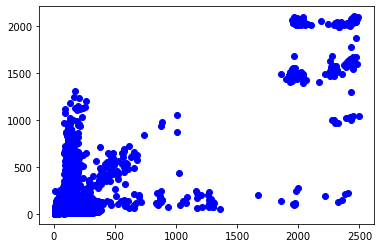

In [13]:
import matplotlib.pyplot as plt
x = anno_result[:,0]
y = anno_result[:,1]
plt.plot(x, y, "bo")